In [1]:
import emcommon.metrics.transit.transit as transit
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

import matplotlib.colors as mcolors


# NTD Metrics Data Only
https://data.transportation.gov/Public-Transit/2022-NTD-Annual-Data-Metrics/ekg5-frzt/explore

Find the average passenger fare, combining both organization paid and passenger paid.
This is potentially not very helpful for estimating cost in a choice model.

True passenger fare is calculated later in this notebook

In [2]:
df = transit.retrieve_transit_fares_dataframe()


In [3]:
#This cell was created for reading convenience.

columns = list(df.columns)

# Move 'Fare Revenues per Unlinked Passenger Trip' to the third position
columns.insert(2, columns.pop(columns.index('Fare Revenues per Unlinked Passenger Trip')))

# Reorder the DataFrame
df = df[columns]

# Preview the transit fares data
display(df.head())


,Agency,City,Fare Revenues per Unlinked Passenger Trip,State,NTD ID,Organization Type,Reporter Type,Report Year,UACE Code,UZA Name,...,Total Operating Expenses,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable
0,"Dunklin County Transit Service, Inc.",Malden,0.00,MO,70063,Private-Non-Profit Corporation,Rural Reporter,2022,NaN,NaN,...,586515,NaN,20973,NaN,8082,NaN,0,NaN,197519,NaN
1,MTA New York City Transit,Brooklyn,1.90,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",...,467111823,NaN,2484579,NaN,2070897,NaN,24395099,NaN,22151691,NaN
2,MTA New York City Transit,Brooklyn,1.30,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",...,5349756161,NaN,1788363060,NaN,20848895,NaN,7055402031,NaN,338199451,NaN
3,MTA New York City Transit,Brooklyn,6.18,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",...,260991861,NaN,8045660,NaN,590916,NaN,120130708,NaN,9484995,NaN
4,MTA New York City Transit,Brooklyn,1.20,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",...,2897009660,NaN,458602306,NaN,11822039,NaN,1088139630,NaN,82638609,NaN


In [4]:
bus_df = transit.calculate_cost_per_pmt(df, 'bus')
print('-' * 80)
transit.calculate_cost_per_pmt(df, 'train')
print('-' * 80)
transit.calculate_cost_per_pmt(df, 'subway')


Mode category: bus
Total Fare Revenue: 2768242207.9599996
Total Passenger Miles: 10111540221
Cost per Passenger Mile Traveled ($/PMT) for bus: 0.27377057772176167
Weighted Average Fare Revenues per Unlinked Passenger Trip: 1.0028702802274847
Non-weighted Average Fare Revenues per Unlinked Passenger Trip: 0.9456302521008404
--------------------------------------------------------------------------------
Mode category: train
Total Fare Revenue: 4983602512.690001
Total Passenger Miles: 17094346380
Cost per Passenger Mile Traveled ($/PMT) for train: 0.29153513108408186
Weighted Average Fare Revenues per Unlinked Passenger Trip: 1.7881872555459086
Non-weighted Average Fare Revenues per Unlinked Passenger Trip: 3.5836764705882356
--------------------------------------------------------------------------------
Mode category: subway
Total Fare Revenue: 3134105767.72
Total Passenger Miles: 9812801701
Cost per Passenger Mile Traveled ($/PMT) for subway: 0.31938949376716846
Weighted Average Fare 

,Agency,City,Fare Revenues per Unlinked Passenger Trip,State,NTD ID,Organization Type,Reporter Type,Report Year,UACE Code,UZA Name,...,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Total Fare Revenue
2,MTA New York City Transit,Brooklyn,1.30,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",...,NaN,1788363060,NaN,20848895,NaN,7055402031,NaN,338199451,NaN,2.324872e+09
14,Washington Metropolitan Area Transit Authority,Washington,2.12,DC,30030,Independent Public Agency or Authority of Tran...,Full Reporter,2022,92242.0,"Washington--Arlington, DC--VA--MD",...,NaN,76077714,NaN,2302036,NaN,404715396,NaN,53126512,NaN,1.612848e+08
20,Los Angeles County Metropolitan Transportation...,Los Angeles,0.29,CA,90154,Independent Public Agency or Authority of Tran...,Full Reporter,2022,51445.0,"Los Angeles--Long Beach--Anaheim, CA",...,NaN,25075130,NaN,286966,NaN,128143989,NaN,6100816,NaN,7.271788e+06
26,Chicago Transit Authority,Chicago,1.32,IL,50066,Independent Public Agency or Authority of Tran...,Full Reporter,2022,16264.0,"Chicago, IL--IN",...,NaN,103524858,NaN,3742178,NaN,615259223,NaN,66984263,NaN,1.366528e+08
42,Massachusetts Bay Transportation Authority,Boston,1.59,MA,10003,Independent Public Agency or Authority of Tran...,Full Reporter,2022,9271.0,"Boston, MA--NH",...,NaN,78861897,NaN,1507475,NaN,266054405,NaN,22214025,NaN,1.253904e+08
49,Southeastern Pennsylvania Transportation Autho...,Philadelphia,1.02,PA,30019,Independent Public Agency or Authority of Tran...,Full Reporter,2022,69076.0,"Philadelphia, PA--NJ--DE--MD",...,NaN,52499263,NaN,1024991,NaN,219803311,NaN,15691660,NaN,5.354925e+07
54,Maryland Transit Administration,Baltimore,2.54,MD,30034,State Government Unit or Department of Transpo...,Full Reporter,2022,4843.0,"Baltimore, MD",...,NaN,2252070,W,191576,NaN,8073716,NaN,4602773,NaN,5.720258e+06
62,"County of Miami-Dade , dba: Transportation & P...",Miami,1.01,FL,40034,"City, County or Local Government Unit or Depar...",Full Reporter,2022,56602.0,"Miami--Fort Lauderdale, FL",...,NaN,11446854,NaN,346766,NaN,84512810,W,7345940,NaN,1.156132e+07
65,"County of Miami-Dade , dba: Transportation & P...",Miami,0.00,FL,40034,"City, County or Local Government Unit or Depar...",Full Reporter,2022,56602.0,"Miami--Fort Lauderdale, FL",...,NaN,5465731,NaN,92477,NaN,5316592,W,943270,NaN,0.000000e+00
116,Metropolitan Atlanta Rapid Transit Authority,Atlanta,1.38,GA,40022,Independent Public Agency or Authority of Tran...,Full Reporter,2022,3817.0,"Atlanta, GA",...,NaN,26079792,NaN,674818,NaN,180808729,NaN,17937424,NaN,3.599011e+07


In [5]:
# drop rows where 'Fare Revenues per Unlinked Passenger Trip' is 0
bus_df = bus_df[bus_df['Fare Revenues per Unlinked Passenger Trip'] > 0]


In [6]:
#sort by Fare Revenues per Unlinked Passenger Trip
display(bus_df.sort_values('Fare Revenues per Unlinked Passenger Trip', ascending=False).head())
display(bus_df.sort_values('Fare Revenues per Unlinked Passenger Trip', ascending=True).head())

,Agency,City,Fare Revenues per Unlinked Passenger Trip,State,NTD ID,Organization Type,Reporter Type,Report Year,UACE Code,UZA Name,...,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Total Fare Revenue
1270,City of Santa Rosa,Santa Rosa,20.01,CA,90017,"City, County or Local Government Unit or Depar...",Full Reporter,2022,79498.0,"Santa Rosa, CA",...,NaN,4686,NaN,2006,NaN,17057,NaN,20969,NaN,93766.86
548,Cumberland Dauphin-Harrisburg Transit Authorit...,NaN,11.52,PA,30014,Independent Public Agency or Authority of Tran...,Full Reporter,2022,37081.0,"Harrisburg, PA",...,NaN,11377,NaN,5061,NaN,74213,NaN,67005,NaN,131063.04
841,"Golden Gate Bridge, Highway and Transportation...",San Francisco,7.01,CA,90016,Independent Public Agency or Authority of Tran...,Full Reporter,2022,78904.0,"San Francisco--Oakland, CA",...,NaN,1037926,NaN,120747,NaN,16540824,NaN,2099125,NaN,7275861.26
2991,Private Transportation Corporation,Brooklyn,3.56,NY,20175,Private-For-Profit Corporation,Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",...,NaN,269139,NaN,10406,NaN,1435024,NaN,110101,NaN,958134.84
1222,City of DeKalb,Dekalb,3.34,IL,50176,"City, County or Local Government Unit or Depar...",Full Reporter,2022,22960.0,"DeKalb, IL",...,NaN,574576,NaN,57696,NaN,1303453,NaN,718568,NaN,1919083.84


,Agency,City,Fare Revenues per Unlinked Passenger Trip,State,NTD ID,Organization Type,Reporter Type,Report Year,UACE Code,UZA Name,...,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Total Fare Revenue
891,"County of Rockland , dba: Public Transportatio...",New City,0.01,NY,20084,"City, County or Local Government Unit or Depar...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",...,NaN,1165925,NaN,102031,NaN,8885715,NaN,1848240,NaN,11659.25
689,Research Triangle Regional Public Transportati...,Durham,0.01,NC,40108,Independent Public Agency or Authority of Tran...,Full Reporter,2022,25228.0,"Durham, NC",...,NaN,1393060,NaN,99387,NaN,12131829,W,2024127,NaN,13930.60
462,"City of Albuquerque, dba: ABQRIDE",Albuquerque,0.02,NM,60019,"City, County or Local Government Unit or Depar...",Full Reporter,2022,1171.0,"Albuquerque, NM",...,NaN,1591093,NaN,65660,NaN,5941571,NaN,806518,NaN,31821.86
331,City of Tucson,Tucson,0.02,AZ,90033,"City, County or Local Government Unit or Depar...",Full Reporter,2022,88732.0,"Tucson, AZ",...,NaN,13042145,NaN,631289,NaN,53677395,NaN,7533020,NaN,260842.90
1143,"Frederick County, Maryland, dba: TransIT Servi...",Frederick,0.03,MD,30072,"City, County or Local Government Unit or Depar...",Full Reporter,2022,31519.0,"Frederick, MD",...,NaN,473677,NaN,60043,NaN,2528487,NaN,762044,NaN,14210.31


# Shapefiles from natural earth
https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip

https://www2.census.gov/geo/tiger/TIGER2023/UAC/tl_2023_us_uac20.zip


/var/folders/zp/zk66zxkj0_5d59vffwm9xkf5yvy8rv/T/ipykernel_78240/3424055211.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_fares = df.groupby('UACE Code').apply(


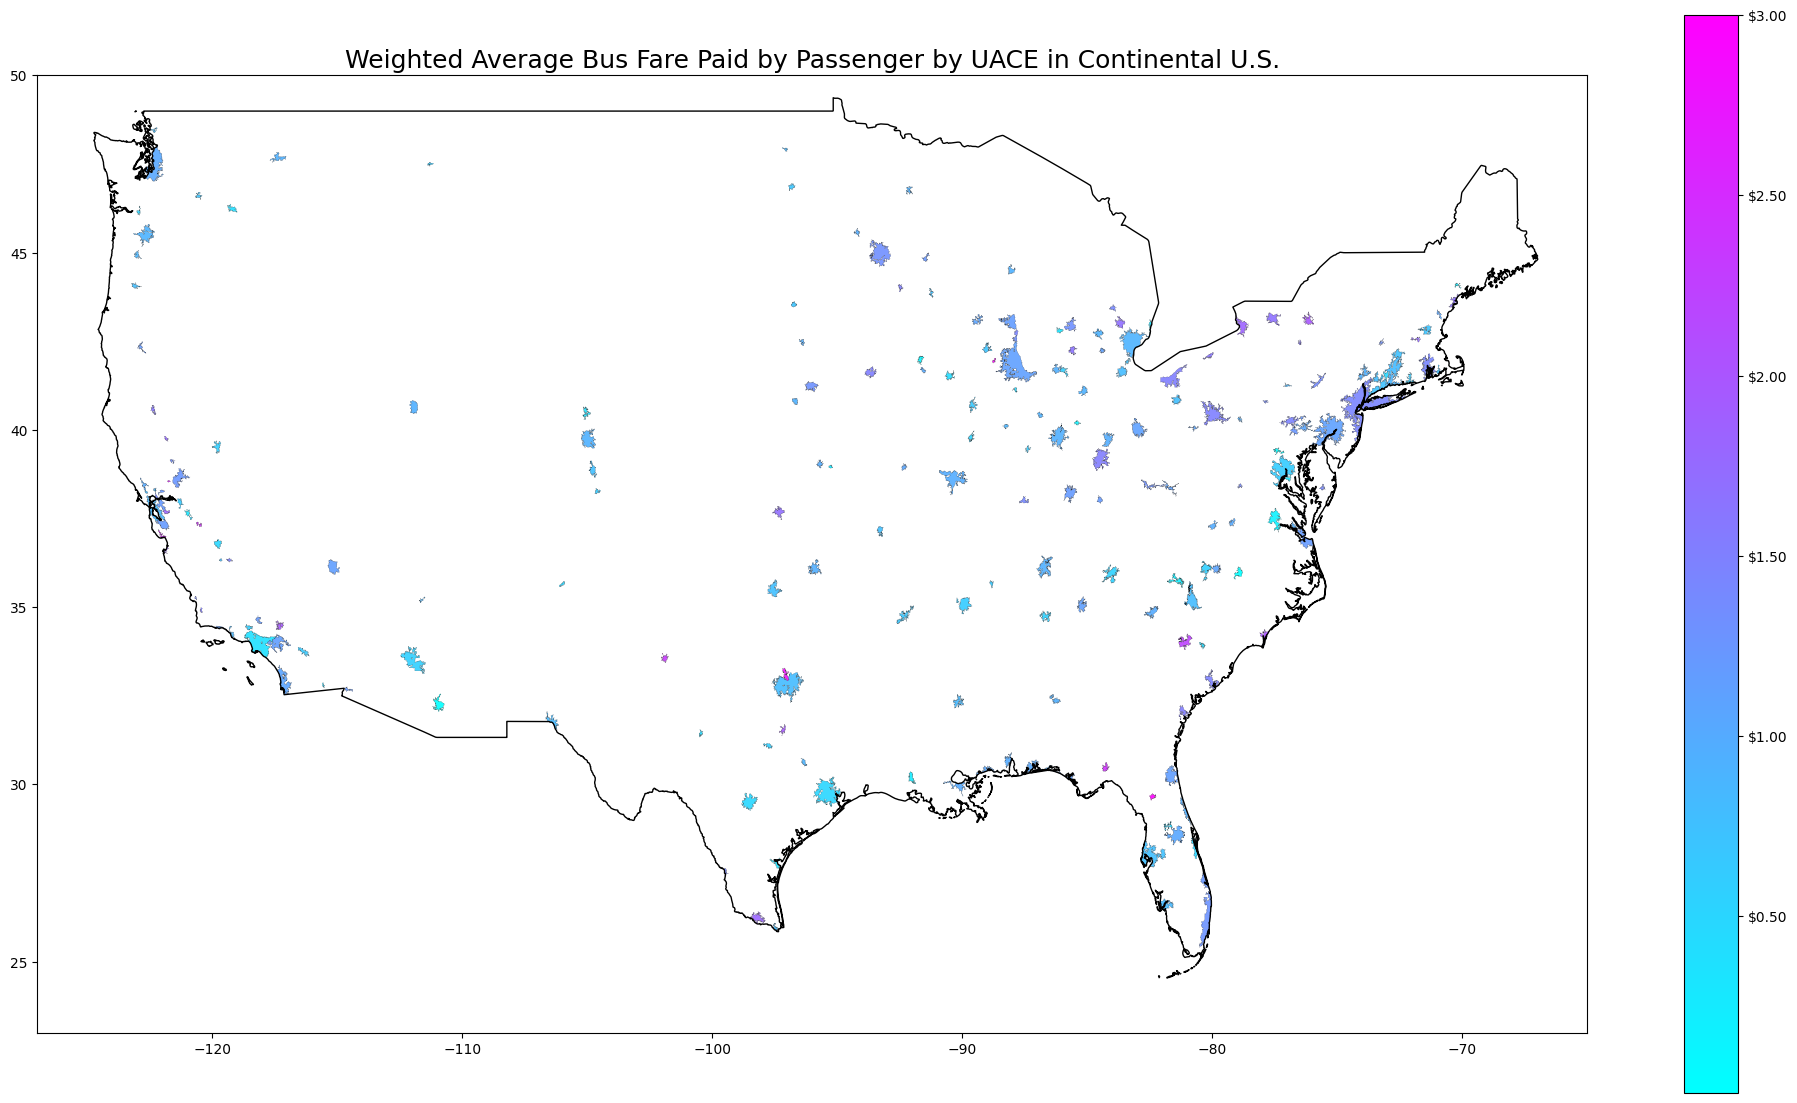

In [7]:
# load the Natural Earth shapefile for countries (10m resolution)
world = gpd.read_file("shapefile/ne_10m_admin_0_countries.shp")

# filter for the United States
us_boundary = world[world['NAME'] == 'United States of America']

uace_shapefile = gpd.read_file("shapefile/tl_2023_us_uac20.shp")

# Assuming df already has 'UACE Code' and is merged correctly
df = bus_df.dropna(subset=['UACE Code'])
df['UACE Code'] = df['UACE Code'].astype(int).astype(str)
uace_shapefile['UACE20'] = uace_shapefile['UACE20'].astype(str)

# Group by UACE Code and calculate the weighted average fare for each UACE
# Weight by 'Unlinked Passenger Trips' column
weighted_fares = df.groupby('UACE Code').apply(
    lambda x: (x['Fare Revenues per Unlinked Passenger Trip'] * x['Unlinked Passenger Trips']).sum() / x['Unlinked Passenger Trips'].sum()
).reset_index(name='Weighted Fare Revenues per Unlinked Passenger Trip')

# merge the weighted average fares back into the UACE shapefile
merged = uace_shapefile.merge(weighted_fares, left_on='UACE20', right_on='UACE Code')

fig, ax = plt.subplots(1, 1, figsize=(25, 14))

# avoid distortion
ax.set_aspect('equal')

# plot by weighted fare revenues per trip
plot = merged.plot(column='Weighted Fare Revenues per Unlinked Passenger Trip', 
            cmap='cool',
            legend=True, 
            linewidth=0.1,
            alpha=0.9,
            ax=ax, 
            edgecolor='black',
            vmax=3)

# overlay us boundary
us_boundary.boundary.plot(ax=ax, linewidth=1, color='black')

# overlay the U.S. state boundaries
# us_states.boundary.plot(ax=ax, linewidth=1, color='grey')  # Plot state boundaries in grey

ax.set_title('Weighted Average Bus Fare Paid by Passenger by UACE in Continental U.S.', fontsize=18)

# contiguous U.S.
ax.set_xlim([-127, -65])
ax.set_ylim([23, 50])

# add dollar signs
formatter = FuncFormatter(lambda x, _: f'${x:.2f}')

cbar = plot.get_figure().axes[-1]
cbar.yaxis.set_major_formatter(formatter)

plt.savefig('fare_revenue_map_with_us_borders_and_states_weighted.png', dpi=300)
plt.savefig('fare_revenue_map_with_us_borders_and_states_weighted.pdf')

plt.show()


In [8]:
bus_df['Cost per PMT'] = bus_df['Total Fare Revenue'] / bus_df['Passenger Miles']

# cheapest cost per pmt first
sorted_df = bus_df.sort_values(by='Cost per PMT', ascending=True)
print(len(sorted_df))

sorted_df.tail()



413


,Agency,City,Fare Revenues per Unlinked Passenger Trip,State,NTD ID,Organization Type,Reporter Type,Report Year,UACE Code,UZA Name,...,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Total Fare Revenue,Cost per PMT
1035,Portage Area Regional Transportation Authority,Kent,3.27,OH,50021,Independent Public Agency or Authority of Tran...,Full Reporter,2022,766.0,"Akron, OH",...,591881,NaN,49591,NaN,1544809,NaN,672463,NaN,1935450.87,1.252874
1222,City of DeKalb,Dekalb,3.34,IL,50176,"City, County or Local Government Unit or Depar...",Full Reporter,2022,22960.0,"DeKalb, IL",...,574576,NaN,57696,NaN,1303453,NaN,718568,NaN,1919083.84,1.472308
548,Cumberland Dauphin-Harrisburg Transit Authorit...,NaN,11.52,PA,30014,Independent Public Agency or Authority of Tran...,Full Reporter,2022,37081.0,"Harrisburg, PA",...,11377,NaN,5061,NaN,74213,NaN,67005,NaN,131063.04,1.766039
75,"Metro-North Commuter Railroad Company, dba: MT...",New York,1.54,NY,20078,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",...,151723,NaN,28476,NaN,110576,NaN,132117,NaN,233653.42,2.113057
1270,City of Santa Rosa,Santa Rosa,20.01,CA,90017,"City, County or Local Government Unit or Depar...",Full Reporter,2022,79498.0,"Santa Rosa, CA",...,4686,NaN,2006,NaN,17057,NaN,20969,NaN,93766.86,5.497266


In [9]:
# display(sorted_df)
# for row in sorted_df print the agency name and the city name
for index, row in sorted_df.iterrows():
    print(row['Agency'], 'bus system')

Research Triangle Regional Public Transportation Authority, dba: GoTriangle bus system
County of Rockland , dba: Public Transportation - Transport of Rockland bus system
City of Tucson bus system
City of Albuquerque, dba: ABQRIDE bus system
Frederick County, Maryland, dba: TransIT Services of Frederick County bus system
City of Cedar Rapids, dba: Cedar Rapids Transit bus system
Massachusetts Bay Transportation Authority bus system
River Bend Transit bus system
Prince George's County, Maryland, dba: Prince George's County Transit bus system
Utah Transit Authority bus system
City of Tallahassee, dba: StarMetro bus system
Connecticut Department of Transportation -CTTRANSIT New Britain bus system
Los Angeles County Metropolitan Transportation Authority , dba: Metro bus system
Greater Richmond Transit Company bus system
Western Piedmont Regional Transit Authority , dba: dba: Greenway Public Transportation bus system
Connecticut Department of Transportation - CTTransit New Britain -Dattco. b

# Use Both Metrics and Fare Revenues NTD Data

https://data.transportation.gov/Public-Transit/2022-NTD-Annual-Data-Metrics/ekg5-frzt/explore
and
https://www.transit.dot.gov/ntd/data-product/2022-annual-database-fare-revenues

This allows us to get a more accurate value in the passenger's responsibility for the fare, instead of
incorporating organizations' responsibility.

In [10]:
fares = transit.retrieve_transit_fares_dataframe()
fares

,Agency,City,State,NTD ID,Organization Type,Reporter Type,Report Year,UACE Code,UZA Name,Primary UZA Population,...,Total Operating Expenses,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable
0,"Dunklin County Transit Service, Inc.",Malden,MO,70063,Private-Non-Profit Corporation,Rural Reporter,2022,NaN,NaN,NaN,...,586515,NaN,20973,NaN,8082,NaN,0,NaN,197519,NaN
1,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,467111823,NaN,2484579,NaN,2070897,NaN,24395099,NaN,22151691,NaN
2,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,5349756161,NaN,1788363060,NaN,20848895,NaN,7055402031,NaN,338199451,NaN
3,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,260991861,NaN,8045660,NaN,590916,NaN,120130708,NaN,9484995,NaN
4,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,2897009660,NaN,458602306,NaN,11822039,NaN,1088139630,NaN,82638609,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,Town of Limon,Limon,CO,80211,"City, County or Local Government Unit or Depar...",Rural Reporter,2022,NaN,NaN,NaN,...,24538,NaN,3337,NaN,916,NaN,0,NaN,5951,NaN
3683,"Advance Transit, Inc. NH",White River Junction,VT,10137,Private-Non-Profit Corporation,Rural Reporter,2022,NaN,NaN,NaN,...,311290,NaN,4451,NaN,3130,NaN,0,NaN,35490,NaN
3684,Southern Teton Area Rapid Transit,Jackson,WY,80188,Independent Public Agency or Authority of Tran...,Rural Reporter,2022,NaN,NaN,NaN,...,427845,NaN,22118,NaN,2014,NaN,0,NaN,62397,NaN
3685,"Advance Transit, Inc. NH",White River Junction,VT,10137,Private-Non-Profit Corporation,Rural Reporter,2022,NaN,NaN,NaN,...,3222760,NaN,332062,NaN,29240,NaN,0,NaN,364030,NaN


In [11]:
revenue = transit.retrieve_fare_revenue_dataframe()
revenue

,State/Parent NTD ID,NTD ID,Agency Name,Reporter Type,Reporting Module,Mode,TOS,Expense Type,Passenger Paid Fares,Organization Paid Fares,Total Fares
0,NaN,1,King County Department of Metro Transit,Full Reporter,Urban,CB,PT,Funds Earned During Period,1927211.0,3289701.0,5216912
1,NaN,1,King County Department of Metro Transit,Full Reporter,Urban,DR,PT,Funds Earned During Period,740726.0,NaN,740726
2,NaN,1,King County Department of Metro Transit,Full Reporter,Urban,DR,TX,Funds Earned During Period,91601.0,NaN,91601
3,NaN,1,King County Department of Metro Transit,Full Reporter,Urban,FB,DO,Funds Earned During Period,1316658.0,398607.0,1715265
4,NaN,1,King County Department of Metro Transit,Full Reporter,Urban,LR,PT,Funds Earned During Period,15128592.0,14257888.0,29386480
...,...,...,...,...,...,...,...,...,...,...,...
6081,9R01,99453,City of Winslow,Rural Reporter,Rural,DR,DO,Funds Expended on Operations,5132.0,NaN,5132
6082,9R02,99454,Palo Verde Valley Transit Agency,Rural Reporter,Rural,CB,PT,Funds Expended on Capital,NaN,0.0,0
6083,9R02,99454,Palo Verde Valley Transit Agency,Rural Reporter,Rural,CB,PT,Funds Expended on Operations,16719.0,0.0,16719
6084,9R02,99454,Palo Verde Valley Transit Agency,Rural Reporter,Rural,MB,PT,Funds Expended on Capital,0.0,0.0,0


In [12]:
# the intention is to drop copies of rows of the same agency.
# mostly empty rows that have 0 Total Fares anyway.

# Check for duplicates in fares DataFrame
fares_duplicates = fares[fares.duplicated(subset=['NTD ID', 'Mode', 'TOS'], keep=False)]
if not fares_duplicates.empty:
    print("Duplicates found in fares DataFrame based on NTD ID, Mode, and TOS:")
    # display(fares_duplicates)
    # Drop rows where 'Agency VOMS' is 0
    fares = fares[~((fares['NTD ID'].isin(fares_duplicates['NTD ID'])) & 
                    (fares['Mode'].isin(fares_duplicates['Mode'])) & 
                    (fares['TOS'].isin(fares_duplicates['TOS'])) & 
                    (fares['Agency VOMS'] == 0))]
    print("Dropped rows in fares DataFrame where 'Agency VOMS' is 0")
    # Remove remaining duplicates, keeping the first occurrence
    fares = fares.drop_duplicates(subset=['NTD ID', 'Mode', 'TOS'], keep='first')

# Check for duplicates in revenue DataFrame
revenue_duplicates = revenue[revenue.duplicated(subset=['NTD ID', 'Mode', 'TOS'], keep=False)]
if not revenue_duplicates.empty:
    print("Duplicates found in revenue DataFrame based on NTD ID, Mode, and TOS:")
    # display(revenue_duplicates.head(55))
    # Drop rows where 'Total Fares' is 0
    revenue = revenue[~((revenue['NTD ID'].isin(revenue_duplicates['NTD ID'])) & 
                       (revenue['Mode'].isin(revenue_duplicates['Mode'])) & 
                       (revenue['TOS'].isin(revenue_duplicates['TOS'])) & 
                       (revenue['Total Fares'] == 0))]
    print("Dropped rows in revenue DataFrame where 'Total Fares' is 0")
    # Remove remaining duplicates, keeping the first occurrence
    revenue = revenue.drop_duplicates(subset=['NTD ID', 'Mode', 'TOS'], keep='first')

# perform the join on NTD ID, Mode, and TOS
merged_df = pd.merge(fares, revenue, on=['NTD ID', 'Mode', 'TOS'])

display(merged_df.head())

Duplicates found in fares DataFrame based on NTD ID, Mode, and TOS:
Dropped rows in fares DataFrame where 'Agency VOMS' is 0
Duplicates found in revenue DataFrame based on NTD ID, Mode, and TOS:
Dropped rows in revenue DataFrame where 'Total Fares' is 0


,Agency,City,State,NTD ID,Organization Type,Reporter Type_x,Report Year,UACE Code,UZA Name,Primary UZA Population,...,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,State/Parent NTD ID,Agency Name,Reporter Type_y,Reporting Module,Expense Type,Passenger Paid Fares,Organization Paid Fares,Total Fares
0,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,22151691,NaN,NaN,MTA New York City Transit,Full Reporter,Urban,Funds Earned During Period,4.728186e+06,NaN,4728186
1,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,338199451,NaN,NaN,MTA New York City Transit,Full Reporter,Urban,Funds Earned During Period,2.326783e+09,NaN,2326782567
2,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,9484995,NaN,NaN,MTA New York City Transit,Full Reporter,Urban,Funds Earned During Period,4.972981e+07,NaN,49729810
3,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,82638609,NaN,NaN,MTA New York City Transit,Full Reporter,Urban,Funds Earned During Period,5.520009e+08,NaN,552000888
4,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,3008832,NaN,NaN,MTA New York City Transit,Full Reporter,Urban,Funds Earned During Period,1.989192e+07,NaN,19891924


In [13]:
#where City == Gainesville and State == FL

gnv = (merged_df[(merged_df['City'] == 'Gainesville') & (merged_df['State'] == 'FL') & (merged_df['Mode'] == 'MB')])
# divide gnv['Passenger Paid Fares'] by gnv['Unlinked Passenger Trips']
print(gnv['Passenger Paid Fares'] / gnv['Unlinked Passenger Trips'])

# do this for each row and make a column named Average Fare
merged_df['Average Fare'] = merged_df['Passenger Paid Fares'] / merged_df['Unlinked Passenger Trips']

bus_df = merged_df[merged_df['Mode'] == 'MB']

display(bus_df.head())

485    0.07352
dtype: float64


,Agency,City,State,NTD ID,Organization Type,Reporter Type_x,Report Year,UACE Code,UZA Name,Primary UZA Population,...,Vehicle Revenue Miles Questionable,State/Parent NTD ID,Agency Name,Reporter Type_y,Reporting Module,Expense Type,Passenger Paid Fares,Organization Paid Fares,Total Fares,Average Fare
3,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,NaN,NaN,MTA New York City Transit,Full Reporter,Urban,Funds Earned During Period,552000888.0,NaN,552000888,1.203659
9,New Jersey Transit Corporation,Newark,NJ,20080,Other Publicly-Owned or Privately Chartered Co...,Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,NaN,NaN,New Jersey Transit Corporation,Full Reporter,Urban,Funds Earned During Period,5256783.0,0.0,5256783,0.725281
10,New Jersey Transit Corporation,Newark,NJ,20080,Other Publicly-Owned or Privately Chartered Co...,Full Reporter,2022,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,NaN,NaN,New Jersey Transit Corporation,Full Reporter,Urban,Funds Earned During Period,242952995.0,0.0,242952995,2.544085
15,Washington Metropolitan Area Transit Authority,Washington,DC,30030,Independent Public Agency or Authority of Tran...,Full Reporter,2022,92242.0,"Washington--Arlington, DC--VA--MD",5174759.0,...,NaN,NaN,Washington Metropolitan Area Transit Authority,Full Reporter,Urban,Funds Earned During Period,1016066.0,NaN,1016066,1.368893
16,Washington Metropolitan Area Transit Authority,Washington,DC,30030,Independent Public Agency or Authority of Tran...,Full Reporter,2022,92242.0,"Washington--Arlington, DC--VA--MD",5174759.0,...,NaN,NaN,Washington Metropolitan Area Transit Authority,Full Reporter,Urban,Funds Earned During Period,46538951.0,NaN,46538951,0.590818


/var/folders/zp/zk66zxkj0_5d59vffwm9xkf5yvy8rv/T/ipykernel_78240/3312568318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_df['State Full'] = bus_df['State'].map(state_abbrev_to_full)
/var/folders/zp/zk66zxkj0_5d59vffwm9xkf5yvy8rv/T/ipykernel_78240/3312568318.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_fare_per_state = bus_df_filtered.groupby('State Full').apply(weighted_avg)


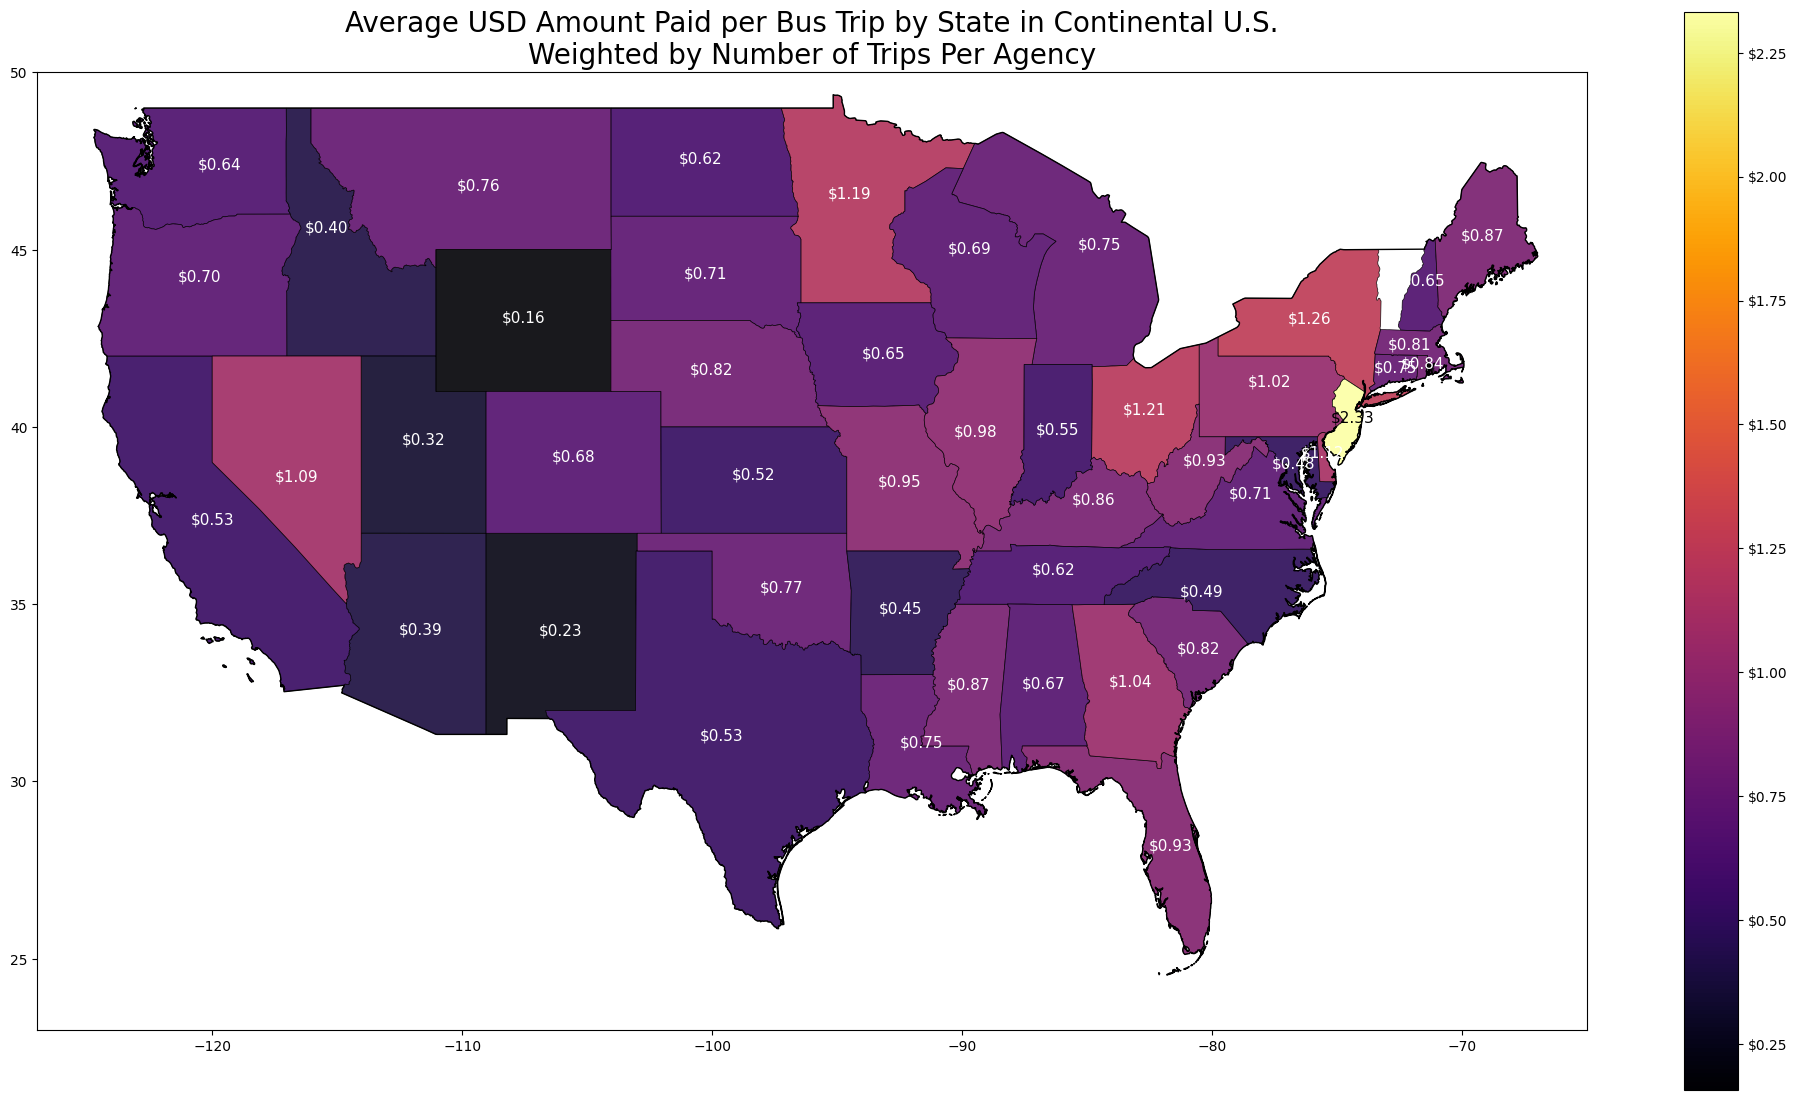

In [14]:
state_abbrev_to_full = transit.us_state_to_abbrev(backwards=True)

# get the full state name from the abbreviation
bus_df['State Full'] = bus_df['State'].map(state_abbrev_to_full)

# drop rows where 'Average Fare' or 'Unlinked Passenger Trips' are missing
bus_df_filtered = bus_df.dropna(subset=['Average Fare', 'Unlinked Passenger Trips'])

# calculate the weighted average fare per state
def weighted_avg(group):
    fare_sum = (group['Average Fare'] * group['Unlinked Passenger Trips']).sum()
    total_trips = group['Unlinked Passenger Trips'].sum()
    return fare_sum / total_trips if total_trips > 0 else float('nan')

# group by state and calculate the weighted average fare, keeping only states with data
weighted_fare_per_state = bus_df_filtered.groupby('State Full').apply(weighted_avg)


world = gpd.read_file("shapefile/ne_10m_admin_0_countries.shp")

us_boundary = world[world['NAME'] == 'United States of America']

us_states = gpd.read_file("shapefile/ne_10m_admin_1_states_provinces.shp")

us_states['name'] = us_states['name'].str.title()

# Add the weighted average fare per state to the GeoDataFrame
us_states['Weighted Fare'] = us_states['name'].map(weighted_fare_per_state)

# remove states without data (i.e., where 'Weighted Fare' is NaN)
us_states_with_data = us_states.dropna(subset=['Weighted Fare'])


# the map must have readable price labels on the states.
# this function will determine if a state is light or dark
def is_light_color(color):
    # convert color to RGB and then to HSV
    r, g, b = mcolors.to_rgb(color)
    hsv = mcolors.rgb_to_hsv([r, g, b])
    # check value (brightness) from HSV
    return hsv[2] > 0.5  # value (brightness) > 0.5 means light


fig, ax = plt.subplots(1, 1, figsize=(25, 14))

ax.set_aspect('equal')

cmap = plt.get_cmap('inferno')

# color by weighted fare
plot = us_states_with_data.plot(column='Weighted Fare', 
                                cmap='inferno',
                                legend=True,
                                linewidth=0.5,
                                alpha=0.9,
                                ax=ax, 
                                edgecolor='black',
                                missing_kwds={'color': 'lightgrey'})


us_boundary.boundary.plot(ax=ax, linewidth=1, color='black')

color_max = 5

# normalize the data for the colormap using the specified maximum value
norm = plt.Normalize(vmin=us_states_with_data['Weighted Fare'].min(), vmax=color_max)

# annotate the prices on the states
for idx, row in us_states_with_data.iterrows():
    if not pd.isna(row['Weighted Fare']):
        
        color = cmap(norm(row['Weighted Fare']))
        
        text_color = 'black' if is_light_color(color) else 'white'
        # use representative_point() to avoid centroid calculation issues
        representative_point = row['geometry'].representative_point()
        plt.annotate(text=f"${row['Weighted Fare']:.2f}", 
                     xy=(representative_point.x, representative_point.y),
                     horizontalalignment='center', 
                     fontsize=11, 
                     color=text_color)


ax.set_title('Average USD Amount Paid per Bus Trip by State in Continental U.S.\nWeighted by Number of Trips Per Agency', fontsize=20)

# set axis limits to focus on the contiguous U.S.
ax.set_xlim([-127, -65])  # Longitude range for continental U.S.
ax.set_ylim([23, 50])     # Latitude range for continental U.S.

# formatter to add dollar signs to the color bar
formatter = FuncFormatter(lambda x, _: f'${x:.2f}')


cbar = plot.get_figure().axes[-1]
cbar.yaxis.set_major_formatter(formatter)

# for paper
plt.savefig('weighted_average_fare_map_by_state.pdf', dpi=300)

plt.show()
